%%html
<style>
    .exercise {
        background-color: #AFEEEE;
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        display: block;
        padding: 5px;
    }
</style>

<center style="font-size:20px;padding-bottom:10px;">Máster en Ciencia de Datos -  Universidad Autónoma de Madrid</center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [1]:
from scipy.stats import beta
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest
import scipy
np.random.seed(123)


# Introducción


En un *enfoque bayesiano* de la estadística, un parámetro $\theta$ se
considera una variable aleatoria con una determinada distribución de
probabilidad. El teorema de Bayes relaciona la información inicial que
se tiene del parámetro $\theta$ antes de realizar un experimento y la
información que se dispone después de realizar el experimento.

-   La información inicial que se tiene sobre $\theta$ se representa
    mediante su *distribución a priori* $\pi(\theta)$

-   La información que se tiene de $\theta$ después de realizar uno
    (o varios) experimento/s, $x$, se codifica mediante su
    *distribución a posteriori* $\pi(\theta | x)$.

-   El teorema de Bayes nos permite obtener la densidad de probabilidad
    $\pi(\theta | x)$ en función del resultado del experimento y la
    densidad de probabilidad a priori $\pi(\theta)$

$$
    \pi(\theta | x) = \frac{ \pi(x | \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \; d\theta} \; \pi(\theta)
$$

-   La cantidad $\pi(x | \theta)$ del numerador se denomina
    *verosimilitud* (*likelihood*). Es una **función** y representa la
    probabilidad de observar el resultado del experimento $x$
    (muestra) en función del valor del parámetro $\theta$

    $$ \pi(x | \theta) = \prod_i f(x_i | \theta) $$

    siendo $x_i$ con $i=1, \ldots, n$ los resultados del
    experimento (valores muestrales) y $f(x_i | \theta)$ sus
    probabilidades para un determinado valor de $\theta$.

-   El denominador $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta$, una vez realizada la integración,
    **no** depende del parámetro $\theta$. Es una constante de
    normalización.

-   Para realizar previsiones se utilizan *distribuciones predictivas*
    (valor esperado de una determinada función)

$$
    E[ g(y|x) ] = \int g(y| \theta) \; \pi(\theta | x)\; d\theta
$$

Por ejemplo, es habitual usar como *predictor* del valor de la v.a
    $\theta$ su valor esperado: $$ \widehat{\theta} = \int
    \theta \; \pi(\theta | x) \; d\theta $$

    
-   Cuando las distribuciones a priori y a posteriori son del mismo tipo
    se dice que son "conjugadas a priori". A menudo esto implica grandes
    beneficios desde el punto de vista computacional.


-   La descripción formal de la inferencia bayesiana es sencilla, sin
    embargo su implementación **habitualmente no es fácil** y requiere
    Métodos de Monte Carlo.


<div class="exercise">
<h1>Ejercicio 1</h1>

Estimar la probabilidad de que un paciente ingresado
en planta acabe en la UCI. Para realizar este problema mediante
inferencia Bayesiana debemos tener en cuenta: 
* La probabilidad de que un paciente ingresado en planta acabe en la UCI será nuestro parámetro
$\theta$. Como hemos visto, en el enfoque bayesiano debemos
considerar que $\theta$ es una variable aleatoria. 
* Debemos conocer
la distribución de la v.a $\theta$ **antes** de realizar el
experimento, es decir su *densidad de probabilidad a priori*
$\pi(\theta)$. Supongamos, por ejemplo, que $\pi(\theta) =
B(\theta | \alpha = 5, \beta = 10)$. 
* Debemos incorporar el
resultado del experimento. Considerad el siguiente experimento: se
contabiliza cuantos de los pacientes que hay en planta ($n$) deben
ingresar en la UCI ($k$). Se observa que de los $n=20$ pacientes en
planta $k=1$ ingresan en la UCI. 
* Debemos calcular la función de
verosimilitud $\pi(x | \theta)$ del resultado del experimento. La
función de verosimilitud será proporcional a la probabilidad de observar
el resultado del experimento en función del valor de $\theta$): $$
\pi(x | \theta) \propto \theta^k (1-\theta)^{n-k} $$ donde, en
este caso, habría que substituir $n=20$ y $k=1$. Notad como en la
ecuación anterior $\pi(x|\theta)$ **no** está normalizada. 
* Debemos elegir un *predictor* adecuado a nuestro problema. Como
predictor de $\theta$ *la probabilidad de que un paciente de la
planta acabe en la UCI* utilizaremos su valor esperado
$E[\theta]$. Nos preguntarnos entonces:

    1. ¿Cuál es el valor de $E[\theta]$ **antes** de realizar el experimento? 
    2. ¿Cuál es el valor de $E[\theta]$ **después** de observar el resultado del experimento?

   
* **Ayuda** La pregunta (1) es fácil. Al ser la distribución a priori $\pi(\theta)$ la distribución $Beta$, su valor esperado será
    $$ \mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta \; B(\theta | \alpha, \beta) \; d\theta = \frac{\alpha}{\alpha + \beta} $$
    
* Para la pregunta (2) se debe calcular: $$ \mu_{\text{posterior}}= E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d\theta $$
Para ello se necesita conocer la distribución a posteriori $\pi(\theta | x)$. Utilizando el teorema de Bayes, tras re-ordenar términos se obtiene: 

<!---
\begin{align*} 
    E[\theta]_{\text{posterior}} &=
    \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d \theta 
    \ &= \int_{-\infty}^{\infty} \theta \; \frac{ \pi(x |
    \theta) \; \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |
    \theta) \pi(\theta) \; d \theta} \; d \theta = \frac{
    \int_{-\infty}^{\infty} \theta \; \pi(x | \theta) \;
    \pi(\theta) \; d \theta } { \int_{-\infty}^{\infty} \pi(x |
    \theta) \; \pi(\theta) \; d \theta} 
    \ &= \frac{\int_{-\infty}^{\infty} \theta \; \theta^k
    (1-\theta)^{n-k} \; \; \pi(\theta) \; d \theta } {
    \int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;
    
    d \theta} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
    \; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
    \int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
    \beta=10) \; d \theta}
\end{align*} 

donde se han sustituído los
valores de $\pi(\theta)$ y de la verosimilitud $\pi(x | \theta)$
. Sino supiésemos resolver analíticamente las integrales anteriores (en
este caso sí hay solución analítica aunque no es fácil) podemos
**estimar** el numerador y el denominador mediante integración de
Monte Carlo.  --->
</div>

### Solución

Para este ejercicio estimaremos la probabilidad de que un paciente ingresado en planta sea trasladado a UCI, que denominaremos por $\theta$. Para ello lo tratamos como una variable aleatoria como hace el enfoque Bayesiano. Consideramos:

- La distribución a priori será una beta de parámetros $\alpha=5, \beta=10$:

$$\pi(\theta) = B(\theta | \alpha = 5, \beta = 10)$$

- El experimento realizado revela que de los $n=20$ pacientes estudiados, unicamente $k=1$ ha sido trasladado a la UCI. La función de verosimilitud será la probabilidad de observar el resultado del experimento dado $\theta$. Esta variable aleatoria sigue una distribución binomial con parámetros $n=20$ y $p=\theta$:

$$\pi(x|\theta) = P_k = \binom{n}{k} \theta^k (1 - \theta)^{n-k} $$

En el caso de nuestro experimento:

$$\pi(x|\theta) = P_1 = \binom{20}{1} \theta^1 (1 - \theta)^{20-1} = 20 \cdot \theta (1 - \theta)^{19}$$ 

Daremos dos predicciones del valor de $\theta$:

1. ¿Cuál es el valor de $E[\theta]$ **antes** de realizar el experimento?
2. ¿Cuál es el valor de $E[\theta]$ **después** de observar el resultado del experimento?

### Respuestas

- La pregunta (1) es sencilla: puesto que $\theta$ sigue una distribución beta con parámetros conocidos, basta con calcular la esperanza de dicha distribución:

\begin{equation*}
    \mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta  \; B(\theta | \alpha, \beta) \;  d\theta =  \frac{\alpha}{\alpha + \beta}
\end{equation*}

Vamos a demostrar este hecho. Lo primero es recordar que la función beta $B:\mathbb C \to \mathbb C$ se define como:
$$
B(\alpha,\beta) = \int_0^1 t^{\alpha-1}(1-t)^{\beta-1}dt = \dfrac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$
y que, si $a \in \mathbb N$, entonces $\Gamma(a) = (a-1)!$. Usando esto, podemos ver que si $X\sim B(\alpha,\beta)$, entonces:
\begin{align*}
E[X] & = \int_{-\infty}^{+\infty} x f_X dx \\
& = \int_{-\infty}^{+\infty} x \left( \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)} \right) dx\\
& = \frac{1}{B(\alpha,\beta)} \int_{-\infty}^{+\infty}x^{\alpha}(1-x)^{\beta-1}dx\\
& = \frac{B(\alpha + 1,\beta)}{B(\alpha,\beta)}\\
& = \frac{\Gamma(\alpha+1) \Gamma(\beta)}{\Gamma(\alpha + \beta + 1)} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\\
& = \frac{\alpha!}{(\alpha+\beta)!} \frac{(\alpha+\beta-1)!}{(\alpha-1)!}\\
& = \frac{\alpha}{\alpha + \beta}
\end{align*}


- Para la pregunta (2) hemos de tener en cuenta los resultados del experimento desde el punto de vista Bayesiano. Utilizando el teorema de Bayes comentado en la introducción obtenemos:

\begin{align*}
    E[\theta]_{\text{posterior}} &= 
    \int_{-\infty}^{\infty} \theta \;  \pi(\theta | x)  \; d\theta \\
                    &= \int_{-\infty}^{\infty} \theta \;     
    \frac{ \pi(x | \theta) \; \pi(\theta) }
    { \int_{-\infty}^{\infty}  \pi(x | \theta) \pi(\theta) \; d\theta} 
    \;  d\theta  = 
    \frac{ \int_{-\infty}^{\infty} \theta  \; \pi(x | \theta) \; \pi(\theta) \;  d\theta }
        { \int_{-\infty}^{\infty}            \pi(x | \theta) \; \pi(\theta) \; d\theta} \\
    &= \frac{\int_{-\infty}^{\infty} \theta  \; \theta^k (1-\theta)^{n-k}  \; \; \pi(\theta) \; d\theta }
    { \int_{-\infty}^{\infty}  \pi(x | \theta) \; \pi(\theta) \; d\theta}  =
    \frac{ \int_{0}^{1}  \; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10) \; d\theta }
    { \int_{0}^{1}   \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10) \; d\theta} 
\end{align*}

Para obtener este valor podemos o bien resolver analíticamente estas integrales, o bien estimarlas utilizando métodos de MonteCarlo. Puede probarse que en este caso la expresión de $\pi(\theta | x)$ es cerrada (esto es, las distribuciones son conjugadas a priori). $\pi(\theta | x)$ viene dada por una distribución beta de parámetros $B(\alpha + k, \beta + n - k)$. Por lo tanto, la respuesta a la segunda pregunta es la esperanza de esta distribución beta:

\begin{equation*}
    \mu_{\text{posterior}} = E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta  \; B(\theta | \alpha + k, \beta + n - k) \;  d\theta =  \frac{\alpha + k}{\alpha + k + \beta + n - k} = \frac{\alpha + k}{\alpha + \beta + n}
\end{equation*}

### Implementación

Procedemos a dibujar las distribuciones de probabilidad para $\theta$ a priori, posteriori, y la verosimilitud. Como la verosimilitud no es una distribución de probabilidad, vamos a normalizarla (multiplicar por una constante para que integre uno en $(0,1)$). Para ello, calculamos su integral en $(0,1)$:

$$
    \int_0^1 \pi(x | \theta) d\theta =  \int_0^1 \binom{n}{k} \theta^k (1 - \theta)^{n-k} d\theta =  \binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n-k} d\theta
$$

Esto es una integral polinómica, que puedes ser resuelta fácilmente si nos damos cuenta de lo siguiente:
$$
\binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n-k} d\theta = \binom{n}{k} B(k,n-k+1) \int_0^1 \theta \ \frac{\theta^{k-1}(1-\theta)^{n-k}}{B(k,n-k+1)} d\theta = \binom{n}{k} B(k,n-k+1) E_\theta[X]
$$

con $X \sim B(k,n-k+1)$ y $B$ la función beta. Con esto, obtenemos:

$$
\binom{n}{k} B(k,n-k+1) E_\theta[X] = \frac{n!}{k!(n-k)!}\frac{\Gamma(k) \Gamma(n-k+1)}{\Gamma(k+n-k+1)} \frac{k}{n+1}
= \frac{n!}{k!(n-k)!}\frac{\Gamma(k) \Gamma(n-k+1)}{\Gamma(n+1)} \frac{k}{n+1} = \frac{n!}{k!(n-k)!}\frac{k}{n+1} \frac{(k-1)!(n-k)!}{n!}
$$

Se cancelan todos los términos salvo uno y obtenemos

$$
\binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n-k} d\theta = \frac{1}{n+1}
$$
Por lo tanto, para convertir a la máxima verosimilutd $\pi(x | \theta)$ en una distribución de probabilidad de $\theta$ basta con multiplicarla por $(n+1)$.



Expected probability a priori: 0.333333
Expected probability a posterior: 0.171429
Experimento:
 Total pacientes: 20  UCI: 1


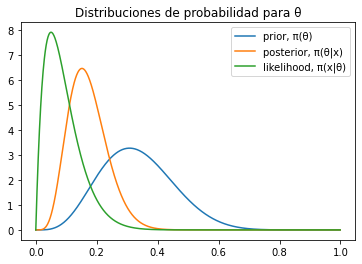

In [2]:
def plot_beta(a, b):
    x = np.arange(0, 1, 0.001)
    y = beta.pdf(x, a, b)
    plt.plot(x, y)

def plot_likelihood(n, k):
    x = np.arange(0, 1, 0.001)
    b = binom(n, k)
    y = (n+1) * b * x**k * (1-x)**(n-k)
    plt.plot(x, y)

def compute_beta_mean(a,b):
    return a / (a + b)

def plot_bayesian_viewpoint(n=20, k=1, a=5, b=10):
    # Print numerical values
    E_prior = compute_beta_mean(a,b)
    E_posterior = compute_beta_mean(a + k, b + n - k)
    print('Expected probability a priori: {:0.6f}'.format(E_prior))
    print('Expected probability a posterior: {:0.6f}'.format(E_posterior))
    print('Experimento:\n Total pacientes: {}  UCI: {}'.format(n, k))

    # Plotting
    plot_beta(a, b)
    plot_beta(a + k, b + n - k)
    plot_likelihood(n, k)

    plt.legend(['prior, π(θ)', 'posterior, π(θ|x)', 'likelihood, π(x|θ)'])
    plt.title('Distribuciones de probabilidad para θ')
    plt.show()

plot_bayesian_viewpoint()

En esta grafica mostramos las distintas distribuciones de probabilidad teóricas comentadas. Podemos apreciar como la distribución a posterior queda intermedia entre la máxima verosimilitud (la predicción de máxima verosimilitud dado el experimento) y la distribución a priori.

<div class="exercise">
    <h2>Ejercicio 1.1</h2>

¿Qué ocurre cuando aumenta el tamaño del experimento?
</div>

Repetimos el experimento anterior manteniendo los valores de $alpha$ y $beta$, y aumentamos $n$ y $k$ manteniendo el ratio de $1/20$ pacientes pasados a UCI: $(n=100, k=5)$:

Expected probability a priori: 0.333333
Expected probability a posterior: 0.086957
Experimento:
 Total pacientes: 100  UCI: 5


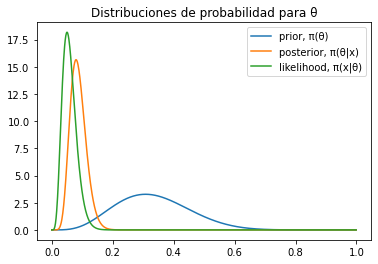

In [3]:
plot_bayesian_viewpoint(n=100, k=5, a=5, b=10)

Vemos como la distribución a posterior tiende a la máxima verosimilitud normalizada. Esto coincide con la intuición, pues a más datos recogidos, más información tenemos sobre el comportamiento real de nuestra variable. Analíticamente sabemos que nuestro estimador a posteriori viene dado por la siguiente expresión:

\begin{equation*}
    \mu_{\text{posterior}} = E[\theta]_{\text{posterior}} = \frac{\alpha + k}{\alpha + \beta + n}
\end{equation*}

Al hacer el experimento arbitrariamente grande manteniendo el ratio $k/n$ el valor del estimador converge a precisamente a este ratio. Es decir, al aumentar el tamaño del experimento, despreciamos la distribución a priori y la información que está nos aporta y se converge al valor de máxima verosimilitud $k/n$.

<div class="exercise">
    <h2>Ejercicio 1.2</h2>

Realiza una simulación utilizando Monte Carlo para estimar el valor de $\theta$.
</div>

Estimaremos el valor de $\theta$ a posteriori, que como ha sido discutido viene dado por la siguiente expresión:

$$
    E[\theta]_{\text{posterior}} =
    \frac{ \int_{0}^{1}  \; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10) \; d\theta }
    { \int_{0}^{1}   \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10) \; d\theta} \equiv \frac{\text{Int}_\text{num}}{\text{Int}_\text{den}}
$$

Para ellos hemos de estimar las integrales del numerador y del denominador. Utilizaremos el algoritmo basado en medias. Este dicta que, dada una variable aleatoria $X$ y una función $h$ podemos estimar su esperanza aplicada a $X$,

$$
    E [ h(x) ] = \int_{\Omega} h(x) \, f(x) \, dx,
$$

por la expresión

$$
    \widehat{\mu} = \frac{1}{m} \sum_{i=1}^{m} h \left( X_i \right)
$$

Para estimar sendas integrales definimos dos funciones:

\begin{align*}
    h_1(\theta) & = \; \theta^{k+1} (1-\theta)^{n-k} \quad & \forall \theta \in [0,1] \\
    h_2(\theta) & = \; \theta^{k} (1-\theta)^{n-k} \quad & \forall \theta \in [0,1]
\end{align*}

De esta forma, si $\theta \sim B(\theta| \alpha=5, \beta=10)$ obtenemos:

\begin{align*}
    E[h_1(\theta)] & = \int_{\Omega} h_1(x) \, f(x) \, dx = \int_{0}^{1}  \; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10) \; d\theta & = \text{Int}_\text{num} \\
    E[h_2(\theta)] & = \int_{\Omega} h_2(x) \, f(x) \, dx =\int_{0}^{1}   \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10) \; d\theta & = \text{Int}_\text{den}
\end{align*}

Aplicando el algoritmo de las medias al numerador y al denominador obtenemos:

$$
    E[\theta]_{\text{posterior}} = \frac{ E[h_1(\theta)] }{ E[h_2(\theta)] } \approx \frac{ \frac{1}{m} \sum_{i=1}^{m} h_1 ( X_i ) }{ \frac{1}{m} \sum_{i=1}^{m} h_2 ( X_i ) } 
    = \frac{ \sum_{i=1}^{m} h_1 ( X_i ) }{ \sum_{i=1}^{m} h_2 ( X_i ) } 
$$

Donde $X_1, \ldots, X_m \stackrel{\text{iid}}{\sim} B(\theta| \alpha=5, \beta=10)$. Por lo tanto, bastará con generar $m$ muestras de una distribución $B(\theta| \alpha=5, \beta=10)$ y computar la expresión anterior.

Expected probability a posteriori MC (after 7000 estimations): 0.088013 +- 0.033
Confidence interval α = 0.22
Experimento:
 Total pacientes: 100  UCI: 5


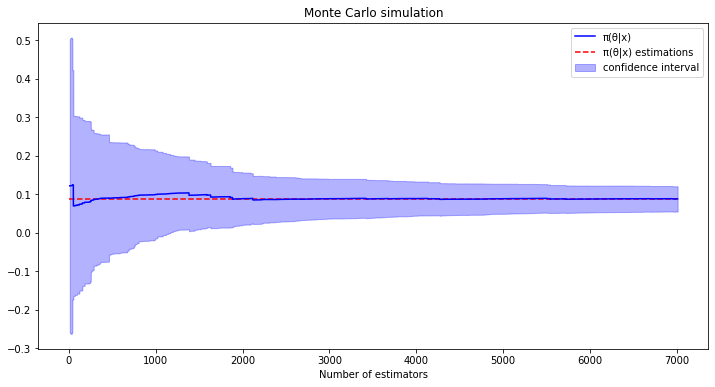

In [4]:
from math import sqrt
def estimate_theta(min_m = 10,max_m=10**5, a=5, b=10, n=20, k=1,alpha = 0.05,dif_samples = False):
    
    ms = np.arange(1, max_m+min_m + 1, 1)
    # Sample from beta distribution
    samples = beta.rvs(a, b, size= len(ms))

    # Apply h1 and h2 to the samples
    h1 = np.array([ x**(k+1) * (1-x)**(n-k) for x in samples ])
    if dif_samples:
        samples = beta.rvs(a,b,size=len(ms))
    h2 = np.array([ x**k * (1-x)**(n-k) for x in samples ])

    # Compute the acumulative sums and the estimators
    int_num = np.cumsum(h1)/ms
    int_den = np.cumsum(h2)/ms
    estimators = int_num / int_den

    # Compute the relative error of each estimator
    std1 = (h1-int_num) * (h1 - int_num)
    std1[1:] = np.cumsum(std1)[1:]/ms[0:-1]
    
    std2 = (h2-int_den) * (h2 - int_den)
    std2[1:] = np.cumsum(std2)[1:]/ms[0:-1]
    
    # Compute the error as 2*norm.percentile(alpha/2)* std/sqrt(n)
    err_h1 =  scipy.stats.norm.ppf(1- alpha/2)*np.sqrt(std1) / np.sqrt(ms)
    err_h2 =  scipy.stats.norm.ppf(1- alpha/2)*np.sqrt(std2) / np.sqrt(ms)
    rel_error = (err_h1/int_num + err_h2/int_den)*estimators

    # Compute the estimators as the quotient of both estimations
    return estimators[min_m:], rel_error[min_m:]

def plot_theta_estimation(min_m = 10, max_m=7*10**3, a=5, b=10, n=100, k=5, alpha=0.05,dif_samples = False):
    # Obtain estimatiors and relative errors
    estimators, rel_error = estimate_theta(max_m=max_m, a=a, b=b, n=n, k=k,dif_samples = dif_samples)
    intervals_min = estimators - rel_error
    intervals_max = estimators + rel_error

    # Plot
    x = np.arange(min_m, max_m + min_m, 1)
    plt.figure(figsize=(12,6))
    plt.hlines(y = compute_beta_mean(a + k, b + n - k), color ="red", linestyle ="--", xmin=0, xmax=max_m)
    plt.plot(x, estimators, color='b')
    plt.fill_between(x, intervals_min, intervals_max, color='b', alpha=.3)
    plt.legend(['π(θ|x)', 'π(θ|x) estimations', 'confidence interval'])
    plt.xlabel('Number of estimators')
    plt.title('Monte Carlo simulation')
    
    # Print numerical values
    print('Expected probability a posteriori MC (after {} estimations): {:.6f} +- {:.3f}'.format(
            max_m, estimators[-1], rel_error[-1]))
    print('Confidence interval α = {}'.format(alpha))
    print('Experimento:\n Total pacientes: {}  UCI: {}'.format(n, k))    
    
    
plot_theta_estimation(alpha=0.22)

<div class="exercise">
    <h2>Ejercicio 1.3</h2>

Responda a las siguientes cuestiones:
    
- Por que se debe utilizar la misma muestra de  $\theta$  en el numerador y denominador para estimar $\mu_{\text{posterior}}$ ?
    
- ¿Por que a la hora de hacer la simulación de M.C hemos podido utilizar una función sin normalizar proporcional a  $\pi(x|\theta)$  eq. (5) y no  $\pi(x|\theta)$?
    
</div>

1. Al generar una muestra de la distribución Beta podemos estar generando *outliers*. Esto es, obtener puntos poco probables que afecten mucho a la estimación realizada. Sin embargo, al usar la misma muestra tanto en el numerador como en el denominador, **compensamos** esos outliers. Si generásemos dos muestras diferentes, podríamos obtener más outliers en una muestra que en otra, lo que reduciría la estabilidad al método. Comprobemos estos hechos empíricamente en el contexto de nuestro problema. Para ello añadidimos un parámetro `dif_samples` a la función que realizada la estimación. Si su valor es `True`, genera una nueva muestra para estimar el denominador. Ejecutamos el siguiente experimento:

Expected probability a posteriori MC (after 7000 estimations): 0.097907 +- 0.035
Confidence interval α = 0.22
Experimento:
 Total pacientes: 100  UCI: 5


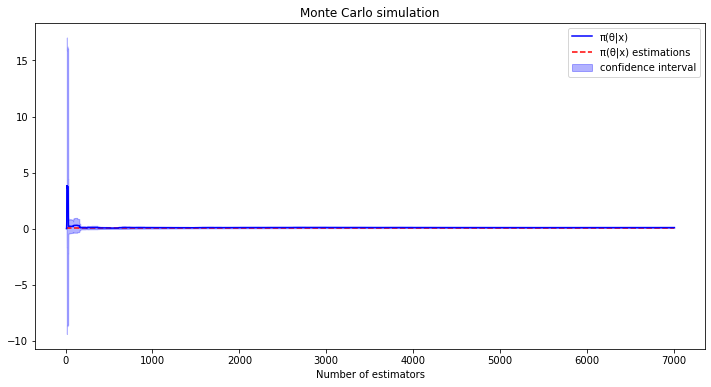

In [5]:
plot_theta_estimation(alpha=0.22,max_m = 7*10**3,dif_samples = True)

Como vemos, al utilizar el mismo número de muestras de nuestro parámetro $\theta$ se llega a un valor diferente del valor esperado de nuestro estimador. Además, podemos observar en el eje $y$ como los intervalos de confianza son muchísimo mayores (es decir, hay mucha menos estabilidad) que en el caso anterior. Esto podría revelar que el método con distintas muestras no converge al valor esperado. Sin embargo, puesot que sabemos como repercute esta variación del algoritmo en la estabilidad del método, comprobamos el resultado del mismo experimento para un mayor número de muestras. Repetimos la prueba realizada para $7 \cdot 10^5$ en vez de $7 \cdot 10^3$ muestras:

Expected probability a posteriori MC (after 700000 estimations): 0.086678 +- 0.003
Confidence interval α = 0.22
Experimento:
 Total pacientes: 100  UCI: 5


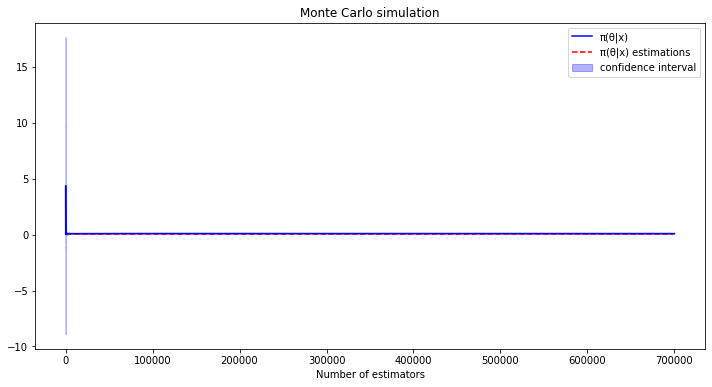

In [6]:
plot_theta_estimation(alpha=0.22,max_m = 7*10**5,dif_samples = True)

Observamos en este caso como al aumentar en una gran cantidad el número de muestras tomadas convergemos al valor esperado teórico de la esperanza de nuestro estimador, además de obtener un intervalo de confianza notablemente más estrecho, lo cual encaja con el marco teórico al tener un alto número de muestras.

En definitiva, hemos demostrado empíricamente que tomar diferentes muestras para numerador y denominador hace el método es mucho más inestable, necesitando de un numero muchísimo mayor de muestras para converger al verdadero valor esperado de nuestro estimador $\theta$, por lo que nuestra hipótesis inicial es cierta en esta cuestión.

2) La segunda pregunta se responde también de manera sencilla. Sea $C$ la constante de normalización que tenemos que usar para tener que $\pi(x|\theta) = C \theta^k(1-\theta)^{n-k}$. Entonces, siempre que usemos $\pi(\theta|x)$, tendremos lo siguiente: 
\begin{align*}
\pi(\theta | x)  & = \frac{ \pi(x | \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \; d\theta} \; \pi(\theta)\\
& = \frac{C \theta^k(1-\theta)^{n-k}} {\int_{-\infty}^{\infty} C \theta^k(1-\theta)^{n-k} \pi(\theta) \; d\theta}\\
& = \frac{C \theta^k(1-\theta)^{n-k}} { C \int_{-\infty}^{\infty} \theta^k(1-\theta)^{n-k} \pi(\theta) \; d\theta}\\
& = \frac{ \theta^k(1-\theta)^{n-k}} {  \int_{-\infty}^{\infty} \theta^k(1-\theta)^{n-k} \pi(\theta) \; d\theta}
\end{align*}
Donde, como vemos, hemos eliminado la constante de normalización. Es por esto que puede parecer que hemos omitido la constante de normalización.

<div class="exercise">
    <h2>Ejercicio 1.4</h2>

Supón que no se dispone de un generador de números aleatorios para la distribución a priori (porqué o bien no dispones de un algoritmo o este es muy ineficaz) ¿Podrías estimar   $\mu_{\text{posterior}}$ ? Estima el valor de  $\mu_{\text{posterior}}$  sin utilizar el generador de una muestra de Beta (por ejemplo utiliza una distribución  $U(0,1)$ ). Discute el intervalo de confianza de la estimación.
</div>

Podemos razonar del siguiente modo. Recordamos que lo que queremos estimar es
$$
    E[\theta]_{\text{posterior}} =
    \frac{ \int_{0}^{1}  \; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10) \; d\theta }
    { \int_{0}^{1}   \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10) \; d\theta} \equiv \frac{\text{Int}_\text{num}}{\text{Int}_\text{den}}
$$
En el ejercicio anterior, habíamos usado la distribución beta para generar muestras, y ahora queremos evitar esto. Sabemos ahora que podemos extraer una muestra de una uniforme $U(0,1)$ de forma eficiente. Sea $g_u(x)$ la función de densidad de esta uniforme, que sabemos que es (esencialmente) la función indicadora en el intervalo $(0,1)$. Podemos considerar entonces lo siguiente:
$$
    E[\theta]_{\text{posterior}} =
    \frac{\int_{0}^{1}   \frac{\; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10)}{g_u(\theta)} g_u(\theta) \; d\theta }
    { \int_{0}^{1}  \frac{ \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10)}{g_u(\theta)}g_u(\theta) \; d\theta} 
$$
Con esto, podemos definir en este caso
\begin{align*}
    h_1(\theta) & = \; \theta^{k+1} (1-\theta)^{n-k}B(\theta| \alpha=5, \beta=10) \quad & \forall \theta \in [0,1] \\
    h_2(\theta) & = \; \theta^{k} (1-\theta)^{n-k}B(\theta| \alpha=5, \beta=10) \quad & \forall \theta \in [0,1]
\end{align*}
Aplicando el algoritmo de las medias al numerador y al denominador obtenemos:

$$
    E[\theta]_{\text{posterior}} = \frac{ E[h_1(\theta)] }{ E[h_2(\theta)] } \approx \frac{ \frac{1}{m} \sum_{i=1}^{m} h_1 ( X_i ) }{ \frac{1}{m} \sum_{i=1}^{m} h_2 ( X_i ) } 
    = \frac{ \sum_{i=1}^{m} h_1 ( X_i ) }{ \sum_{i=1}^{m} h_2 ( X_i ) } 
$$
La diferencia con el caso anterior es que ahora las muestras $X_i$ las vamos a **generar de la distribución uniforme $U(0,1)$**, y las funciones $h_1,h_2$ ahora contienen la función de densidad de la Beta.

Expected probability a posteriori MC (after 7000 estimations): 0.087879 +- 0.013
Confidence interval α = 0.22
Experimento:
 Total pacientes: 100  UCI: 5


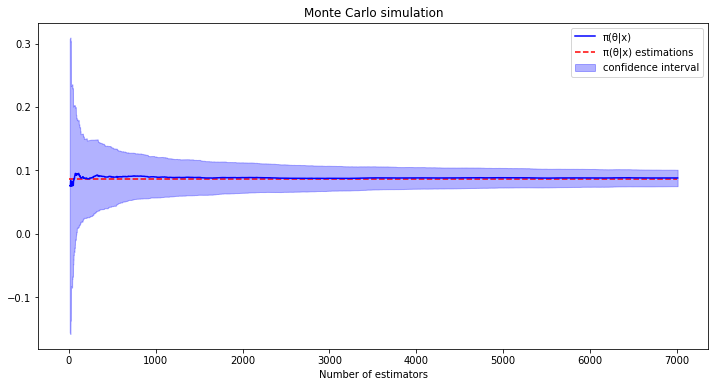

In [7]:
def estimate_theta(min_m = 10,max_m=10**5, a=5, b=10, n=20, k=1,alpha = 0.05,dif_samples = False):
    
    ms = np.arange(1, max_m+min_m +1 , 1)
    # Sample from beta distribution
    
    # Sample from uniform distribution
    samples = np.random.uniform(0, 1, len(ms))
    
    # Apply h1 and h2 to the samples
    h1 = np.array([ x**(k+1) * (1-x)**(n-k) * beta.pdf(x,a,b) for x in samples ])
    h2 = np.array([ x**k * (1-x)**(n-k) * beta.pdf(x,a,b) for x in samples ])

    # Compute the acumulative sums and the estimators
    int_num = np.cumsum(h1)/ms
    int_den = np.cumsum(h2)/ms
    estimators = int_num / int_den

    # Compute the relative error of each estimator
    std1 = (h1-int_num) * (h1 - int_num)
    std1[1:] = np.cumsum(std1)[1:]/ms[0:-1]
    
    std2 = (h2-int_den) * (h2 - int_den)
    std2[1:] = np.cumsum(std2)[1:]/ms[0:-1]
    
    # Compute the error as 2*norm.percentile(alpha/2)* std/sqrt(n)
    err_h1 =  scipy.stats.norm.ppf(1- alpha/2)*np.sqrt(std1) / np.sqrt(ms)
    err_h2 =  scipy.stats.norm.ppf(1- alpha/2)*np.sqrt(std2) / np.sqrt(ms)
    rel_error = (err_h1/int_num + err_h2/int_den)*estimators

    # Compute the estimators as the quotient of both estimations
    return estimators[min_m:], rel_error[min_m:]

plot_theta_estimation(alpha=0.22)

Podemos apreciar como, usando la distribución uniforme para generar muestras y usando el mismo nivel de significancia, el intervalo confianza es más estrecho, es decir, tenemos una menor variabilidad en el resultado, por lo que podríamos afirmar que es más indicado utilizar muestras de la distribución uniforme para estimar el valor esperado de  $\theta$.

<div class="exercise">
    <h2>Ejercicio 2</h2>

Estimar empíricamente la función de densidad de probabilidad a posteriori $\pi(\theta|x)$ del ejercicio anterior y validarla con el resultado teórico. Discutir los resultados.
</div>

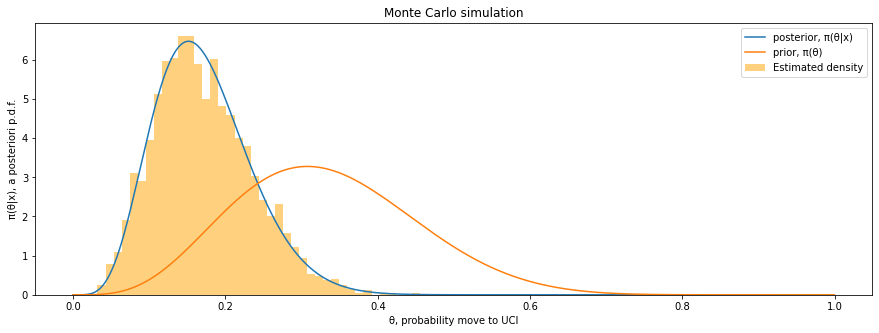

Efficiency = 0.0253
KstestResult(statistic=0.012497548150760096, pvalue=0.819458339817045)


In [8]:
def empiric_posteriori(max_m = 100000,a = 5,b = 10,n = 20,k = 1,plot = True):
    # Obtain MLE estimator
    mle = k/n
    
    # Generate sample from a priori distribution and from the uniform
    sample_prio = beta.rvs(a, b, size=max_m)
    sample_uniform = scipy.stats.uniform.rvs(0,1,size=max_m)
    
    # Compute probabilities: likelihood / argmax_theta likelihood
    probs = np.array([x**k * (1-x)**(n-k) for x in sample_prio])/mle
    
    # Select accepted index
    accepted = sample_prio[probs > sample_uniform]
    
    
    efficiency = len(accepted)/ (len(sample_prio))
    test = kstest(accepted, 'beta', args=(a+k,b+n-k)) 
    
    # Plotting
    if plot:
        fig,ax = plt.subplots(figsize=(15,5))
        plt.hist(accepted,density= True,bins = 40,color='orange',alpha=0.5,label="Histogram")
        plot_beta(a+k, b+n-k)
        plot_beta(a, b)
    
        plt.legend(['posterior, π(θ|x)','prior, π(θ)',  'Estimated density'])
        plt.title('Monte Carlo simulation')
        plt.ylabel('π(θ|x), a posteriori p.d.f.')
        plt.xlabel('θ, probability move to UCI')
        plt.show()

        # Print numerical values
        print("Efficiency = {}".format(efficiency))
        print(test)
        
    return efficiency,test

_,_ = empiric_posteriori()

Tras tomar $max\_m = 100000$ muestras de la distribucion a priori, hemos obtenido que nos hemos quedado únicamente con aproximadamente el $2.4\%$ de las muestras iniciales. Esto nos indica que muy pocas de las muestras que hemos generado de nuestra distribución a priori han sido relevantes para estimar la distribución a posteriori.

Además, obtenemos de realizar el test de Kolmogorov-Smirnov dos valores:

- El estadístico $D$, que nos indica la distancia máxima en valor absoluto entre la función de distribución de ambas muestras. En nuestro caso obtenemos $ D \approx 0.03133$. Estamos obteniendo entonces que la distancia en valor absoluto es pequeña, por lo que podemos pensar que la aproximación de la distribución a priori es buena. Sin embargo, la eficiencia es baja, por lo que no ha sido muy óptimo obtener esta aproximación. 
- El $p-$value nos ayuda a rechazar la hipótesis de que dos muestras son de la misma distribución si $p$ es menor que nuestro nivel de significancia. En este caso, podríamos considerar casi $\alpha = 0.02$, por lo que de nuevo nos indica que nuestra aproximación a la distribución mediante el algoritmo de aceptación/rechazo es buena.


Queremos ver si el número de muestras es relevante, es decir, si al aumentar el número de muestras obtenemos una disminución en el estadístico $D$, lo que nos indicaría que al aumentar las muestras disminuye la distancia entre las funciones de distribución. Realizamos para ello el siguiente experimento.

In [9]:
sizes = np.arange(100,10000,100)
results = [empiric_posteriori(max_m = s, plot = False) for s in sizes]

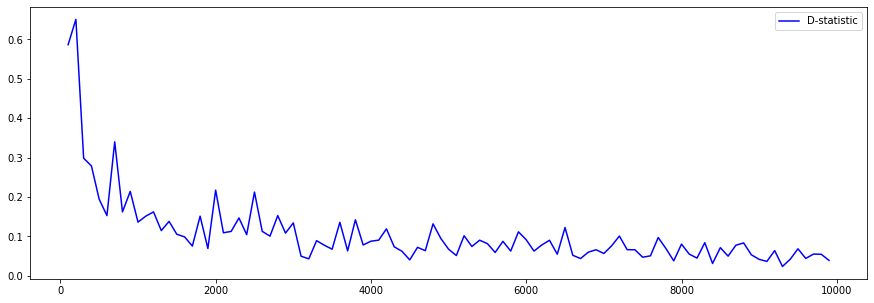

In [10]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(sizes,[r[1][0] for r in results], label = "D-statistic",color = "blue")
ax.legend()
plt.show()

Vemos como, aunque tengamos oscilaciones debido a la pequeña aleatoriedad (inducida por la generación de muestras de la uniforme), la tendencia del estadístico $D$ es a disminuir cuando aumentamos el número de muestras que extraemos de nuestra distribución a priori.